In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("diabetes.csv")

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [129]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [27]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
data["Outcome"].unique()

array([1, 0], dtype=int64)

In [39]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


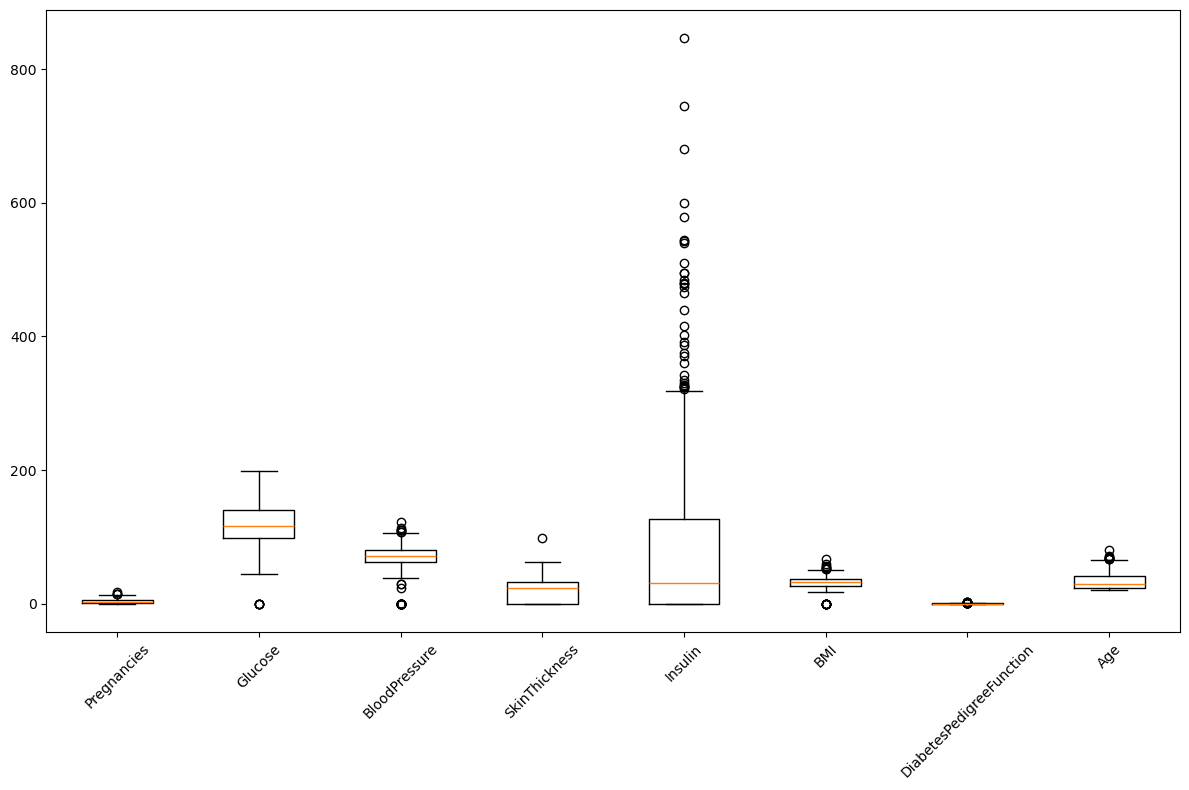

In [131]:
plt.figure(figsize=(12,8))
plt.boxplot(X)
plt.xticks(ticks=range(1,x.shape[1]+1),labels=labels,rotation=45)
plt.tight_layout()
plt.show()

In [78]:
#print("x shape:",x.shape)

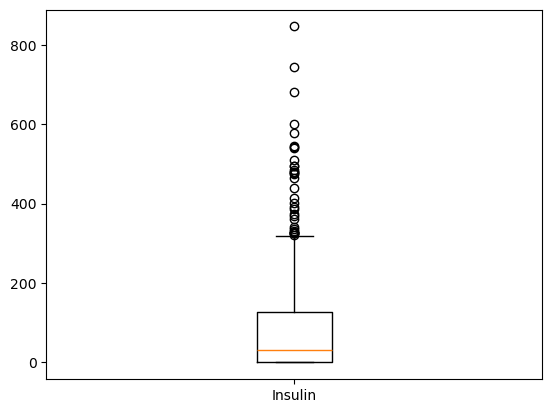

In [105]:
#plt.figure(figsize=(10,6))
plt.boxplot(data["Insulin"],labels=["Insulin"])
plt.show()

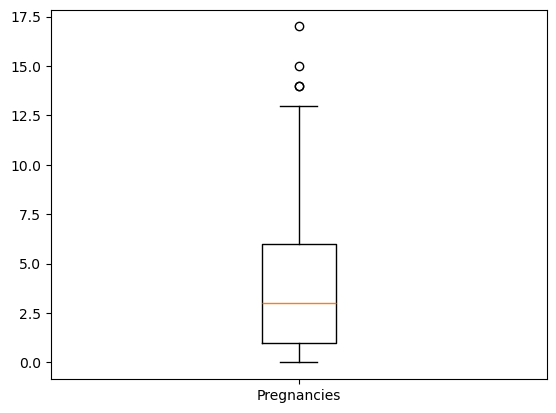

In [137]:
#plt.figure(figsize=(10,6))
plt.boxplot(data["Pregnancies"],labels=["Pregnancies"])
plt.show()

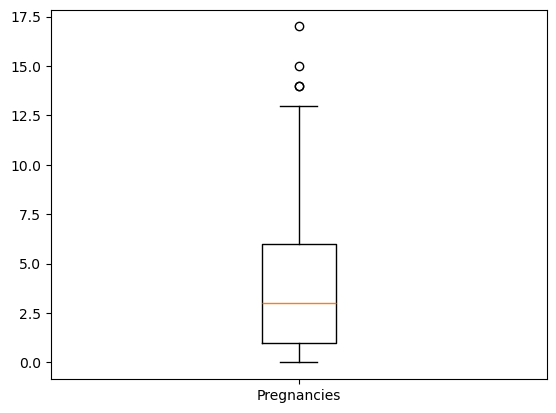

In [139]:
plt.boxplot(X[:, 0], labels=["Pregnancies"])
plt.show()

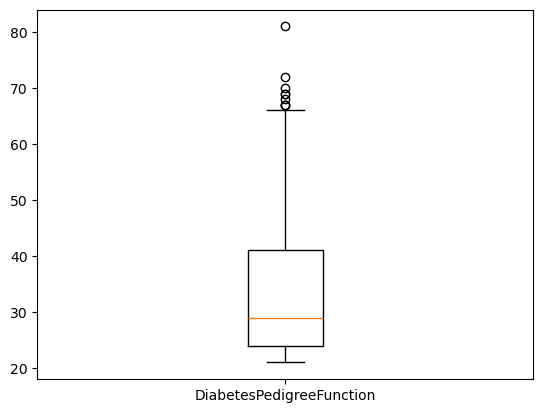

In [111]:
plt.boxplot(Xx[:,7 ], labels=["DiabetesPedigreeFunction"])
plt.show()

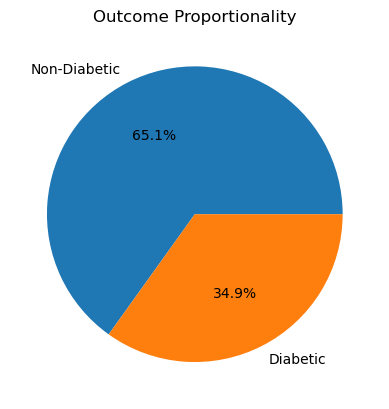

In [143]:
plt.pie(data.Outcome.value_counts(),labels=['Non-Diabetic','Diabetic'],autopct='%.1f%%')
plt.title('Outcome Proportionality')
plt.show()

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=5)





In [181]:
#print(X_train)

In [183]:
#print(y_train)

In [187]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(max_iter=1000)


In [189]:
regressor.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [191]:
regressor.coef_

array([[ 1.17892072e-01,  3.56421084e-02, -1.53157922e-02,
        -1.17051179e-03, -8.68146699e-04,  8.33535005e-02,
         9.31657062e-01,  1.81495925e-02]])

In [193]:
predictedValues=regressor.predict(X_test)

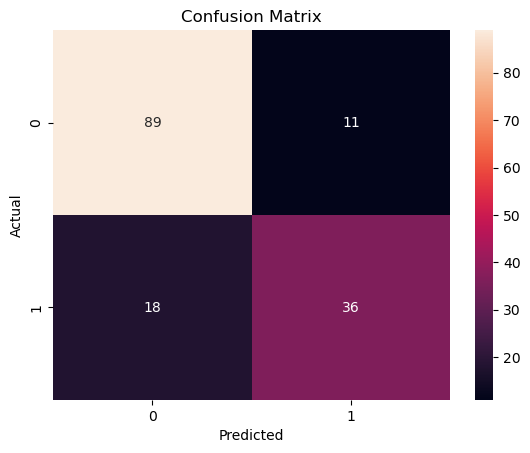

In [173]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cof_matrix=confusion_matrix(y_test, predictedValues)
plt.figure(dpi=100)
sns.heatmap(cof_matrix, annot=True, fmt='d', color='green')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [179]:
result = pd.DataFrame({'Actual':y_test,'Predictions':predictedValues})
print(result)

     Actual  Predictions
0         0            0
1         0            0
2         0            0
3         0            0
4         0            0
..      ...          ...
149       0            0
150       1            1
151       0            1
152       0            0
153       0            1

[154 rows x 2 columns]
